In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
#将下面这些环境变量代码贴到用户目录下.jupyter文件夹里面的jupyter_notebook_config.py文件中就不用每次都在代码中添加这些环境代码了
import os
import sys

os.environ['SPARK_HOME'] = "D:\program\spark2.4.2"
os.environ['PYSPARK_PYTHON'] = "D:\program\python3\python3.exe" #不添加这个的话会报PySpark cannot run with different minor versions.
#Please check environment variables PYSPARK_PYTHON and PYSPARK_DRIVER_PYTHON are correctly set.
os.environ['HADOOP_HOME'] = "D:\program\hadoop-common-2.7.1-bin"

sys.path.append("D:\program\spark2.4.2\bin")
sys.path.append("D:programspark2.4.2\python")
sys.path.append("D:programspark2.4.2\python\pyspark")
sys.path.append("D:programspark2.4.2\python\lib")
sys.path.append("D:programspark2.4.2\python\lib\pyspark.zip")
sys.path.append("D:programspark2.4.2\python\lib\py4j-0.10.4-src.zip")
sys.path.append("D:\program\java8")

In [2]:
spark = SparkSession.builder.appName('spark_sql_demo').getOrCreate()

In [3]:
sc = spark.sparkContext

In [7]:
#rating_data = sc.textFile(r"E:\dataset\ml-20m\ratings.csv")

In [8]:
#print(rating_data.first())

userId,movieId,rating,timestamp


In [9]:
rating_data_body = spark.read.format('CSV').option('header','true').load(r"E:\dataset\ml-20m\ratings.csv")#spark2.0提供的解析CSV文件的方法，可以跳过标题行

In [11]:
print(rating_data_body.first())

Row(userId='1', movieId='2', rating='3.5', timestamp='1112486027')


In [19]:
rownum = spark.sql('select count(*) from user')
print(rownum)

DataFrame[count(1): bigint]


In [20]:
print(rownum.first())

Row(count(1)=20000263)


In [22]:
print(rating_data_body.schema)#查看表结构,写SQL要用

StructType(List(StructField(userId,StringType,true),StructField(movieId,StringType,true),StructField(rating,StringType,true),StructField(timestamp,StringType,true)))


In [26]:
grouped = spark.sql('select userId,count(*) from user group by userId')

In [27]:
hist(grouped,bins=20,color='lightblue',normed=True)

In [30]:
ss=hist(grouped.collect(),bins=20,color='lightblue',normed=True)
ss.show()

NameError: name 'hist' is not defined

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
grouped.hist(bins=50, figsize=(20,15))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'hist'

In [37]:
print(grouped.show()) #使用show函数查看内容，不是其他什么head()

+------+--------+
|userId|count(1)|
+------+--------+
|   296|      25|
|   467|      30|
|   675|     187|
|   691|      35|
|   829|     387|
|  1090|      74|
|  1159|     235|
|  1436|     234|
|  1512|      68|
|  1572|      64|
|  2069|      45|
|  2088|      87|
|  2136|     201|
|  2162|     100|
|  2294|      21|
|  2904|      23|
|  3210|     452|
|  3414|      29|
|  3606|      66|
|  3959|      24|
+------+--------+
only showing top 20 rows

None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D58F5A2470>]],
      dtype=object)

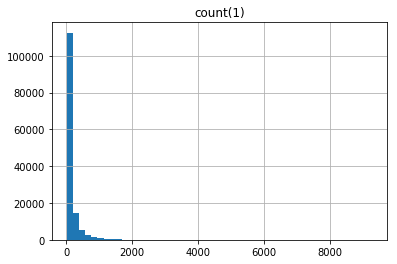

In [38]:
pandas_df = grouped.toPandas() #spark dataframe转pandas dataframe，然后就可以使用pandas来绘图了
pandas_df.hist(bins=20,normed=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D58FDACEB8>]],
      dtype=object)

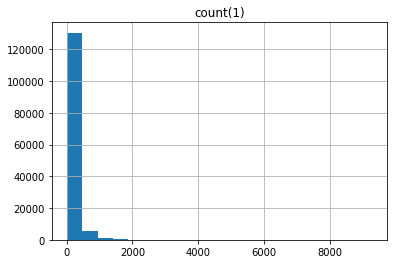

In [41]:
pandas_df.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D58DA2B438>]],
      dtype=object)

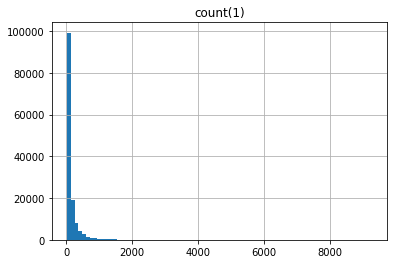

In [43]:
pandas_df.hist(bins=80)

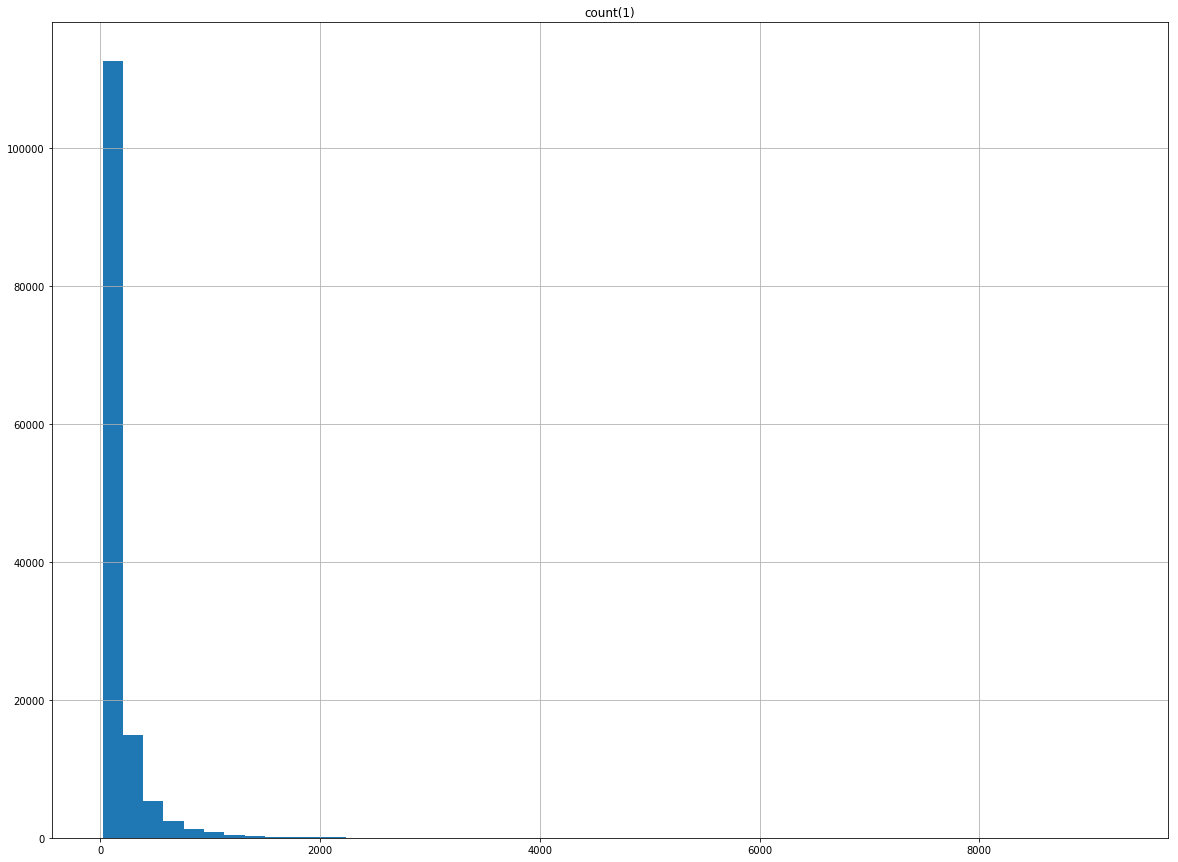

In [44]:
pandas_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
import pyspark.mllib.linalg.Matrix
import pyspark.mllib.linalg.Vectors
import pyspark.mllib.linalg.distributed.RowMatrix
